In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
work_dir = Path(r"D:\Work\2023\three_gorge")
sima_path = work_dir/"suyu_freedecay_data.csv"
cfd_path = work_dir/"heave/RB_DATA.dat"

In [6]:
sima_data_df = pd.read_csv(sima_path)
sima_data_df.head()

,Time [s],heave [m],roll [deg],pitch [deg]
0,0.0,3.682258,4.979211,4.809143
1,0.1,3.679563,4.976808,4.807217
2,0.2,3.668353,4.969272,4.802440
3,0.3,3.648300,4.956541,4.794720
4,0.4,3.619188,4.938879,4.784087


In [7]:
cfd_data_df = pd.read_csv(cfd_path, sep="\s+")
cfd_data_df = cfd_data_df.iloc[0::3,:]
# Get rid of spaces in the columns
cfd_data_df.columns = cfd_data_df.columns.str.replace(" ", "")
cfd_data_df.columns

Index(['Time', 'CORx', 'CORy', 'CORz', 'COMx', 'COMy', 'COMz', 'Rxx', 'Rxy',
       'Rxz', 'Ryx', 'Ryy', 'Ryz', 'Rzx', 'Rzy', 'Rzz', 'vx', 'vy', 'vz', 'wx',
       'wy', 'wz'],
      dtype='object')

In [8]:
cfd_data_df["heave"] = cfd_data_df["COMz"] -cfd_data_df["COMz"].mean()

In [9]:
first_line = cfd_data_df.head(1)

In [10]:
first_line

,Time,CORx,CORy,CORz,COMx,COMy,COMz,Rxx,Rxy,Rxz,...,Rzx,Rzy,Rzz,vx,vy,vz,wx,wy,wz,heave
0,0.0012,43.87862,1.139438e-11,-6.138963,43.87862,1.139438e-11,-6.138963,1.0,-6.148923e-13,8.980194e-12,...,-8.980194e-12,1.028490e-12,1.0,-7.866654e-09,1.899443e-08,0.000999,1.714493e-09,1.496998e-08,1.025025e-09,-7.681918


In [11]:
local_minima = cfd_data_df['heave'][(cfd_data_df['heave'].shift(1) > cfd_data_df['heave']) & (cfd_data_df['heave'].shift(-1) > cfd_data_df['heave'])]
mask = cfd_data_df["heave"].isin(local_minima)
cfd_local_minima_df = cfd_data_df[mask]
cfd_local_minima_df = first_line.append(cfd_local_minima_df).loc[:,["Time","heave"]]
cfd_local_minima_df

C:\Users\33937\AppData\Local\Temp\ipykernel_113000\3866346189.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cfd_local_minima_df = first_line.append(cfd_local_minima_df).loc[:,["Time","heave"]]


,Time,heave
0,0.0012,-7.681918
10641,18.0116,-2.223620
26946,36.7037,-2.207357
40974,53.6641,-2.309679
57126,73.0078,-1.749870
84867,110.1430,-0.052152
94749,127.2910,-0.655190
110325,158.8170,0.217720
119850,177.4020,0.356118


In [12]:
cfd_local_minima_df = cfd_local_minima_df.reset_index(drop=True).reset_index()
cfd_local_minima_df 

,index,Time,heave
0,0,0.0012,-7.681918
1,1,18.0116,-2.223620
2,2,36.7037,-2.207357
3,3,53.6641,-2.309679
4,4,73.0078,-1.749870
5,5,110.1430,-0.052152
6,6,127.2910,-0.655190
7,7,158.8170,0.217720
8,8,177.4020,0.356118


In [13]:
cfd_local_minima_df["Period"] = cfd_local_minima_df["Time"].diff()
cfd_local_minima_df["Amplitude"] = -cfd_local_minima_df["heave"]

In [14]:
cfd_local_minima_df

,index,Time,heave,Period,Amplitude
0,0,0.0012,-7.681918,NaN,7.681918
1,1,18.0116,-2.223620,18.0104,2.223620
2,2,36.7037,-2.207357,18.6921,2.207357
3,3,53.6641,-2.309679,16.9604,2.309679
4,4,73.0078,-1.749870,19.3437,1.749870
5,5,110.1430,-0.052152,37.1352,0.052152
6,6,127.2910,-0.655190,17.1480,0.655190
7,7,158.8170,0.217720,31.5260,-0.217720
8,8,177.4020,0.356118,18.5850,-0.356118


In [15]:
cfd_local_minima_df["Damping"] = (np.log(cfd_local_minima_df.at[0,"Amplitude"])-np.log(cfd_local_minima_df["Amplitude"]))/cfd_local_minima_df["index"]/2/np.pi

d:\anaconda3\envs\vtk\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
cfd_local_minima_df

,index,Time,heave,Period,Amplitude,Damping
0,0,0.0012,-7.681918,NaN,7.681918,NaN
1,1,18.0116,-2.223620,18.0104,2.223620,0.197310
2,2,36.7037,-2.207357,18.6921,2.207357,0.099239
3,3,53.6641,-2.309679,16.9604,2.309679,0.063755
4,4,73.0078,-1.749870,19.3437,1.749870,0.058861
5,5,110.1430,-0.052152,37.1352,0.052152,0.158915
6,6,127.2910,-0.655190,17.1480,0.655190,0.065299
7,7,158.8170,0.217720,31.5260,-0.217720,NaN
8,8,177.4020,0.356118,18.5850,-0.356118,NaN


In [17]:
print(cfd_local_minima_df["Period"].mean())

22.1751


In [18]:
cfd_data_df.to_csv(work_dir/"heave"/"cfd_heave.csv")

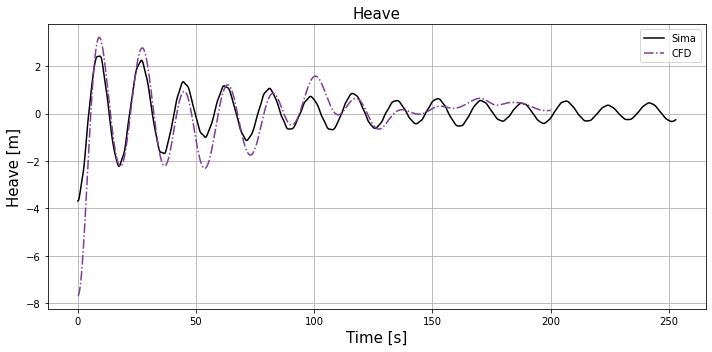

In [19]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(sima_data_df["Time [s]"],-sima_data_df["heave [m]"], "-", color="#000000", fillstyle="none",markersize=12, label="Sima" )
ax.plot(cfd_data_df['Time'], cfd_data_df['heave'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Heave [m]", fontsize=15)
ax.set_title("Heave", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"heave/heave_finemesh.jpg", bbox_inches="tight", dpi=400)

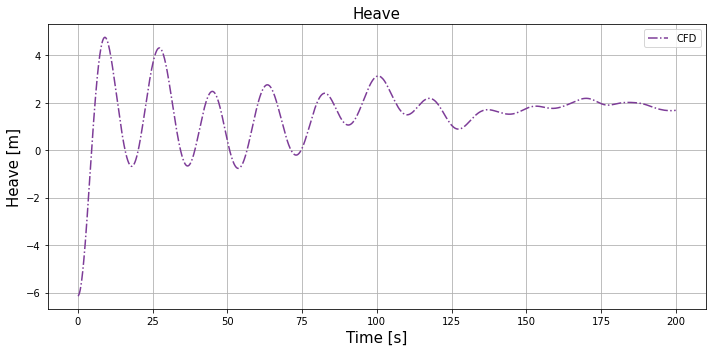

In [20]:
fig,ax = plt.subplots(figsize=(10,5))
# ax.plot(sima_data_df["Time [s]"],-sima_data_df["heave [m]"], "-", color="#000000", fillstyle="none",markersize=12, label="Sima" )
ax.plot(cfd_data_df['Time'], cfd_data_df['COMz'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Heave [m]", fontsize=15)
ax.set_title("Heave", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"heave.jpg", bbox_inches="tight", dpi=400)

In [21]:
def get_euler_angles(df):
    orientation = df[['Rxx', 'Rxy','Rxz', 'Ryx', 'Ryy', 'Ryz', 'Rzx', 'Rzy', 'Rzz']].values
    R = np.reshape(orientation, (3, 3))
    roll = np.arctan2(R[2, 1], R[2, 2])
    pitch = np.arctan2(-R[2, 0], np.sqrt(R[2, 1]**2 + R[2, 2]**2))
    yaw = np.arctan2(R[1, 0], R[0, 0])
    roll_degrees = np.degrees(roll)
    pitch_degrees = np.degrees(pitch)
    yaw_degrees = np.degrees(yaw)
    return roll_degrees, pitch_degrees, yaw_degrees

In [22]:
cfd_data_df[['Roll', 'Pitch', 'Yaw']] = cfd_data_df.apply(get_euler_angles, axis=1, result_type='expand')

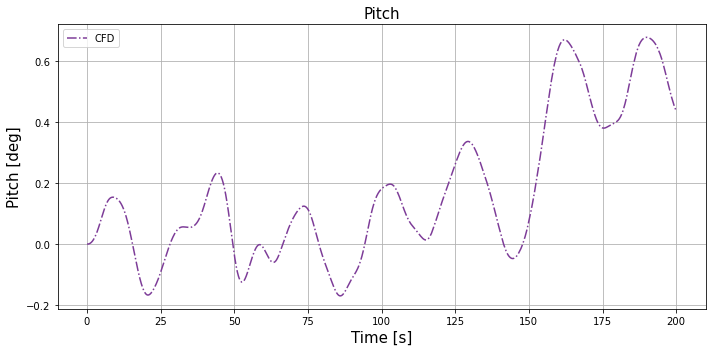

In [24]:
fig,ax = plt.subplots(figsize=(10,5))
# ax.plot(sima_data_df["Time [s]"],sima_data_df["pitch [deg]"], "-", color="#000000", fillstyle="none",markersize=12, label="Sima" )
ax.plot(cfd_data_df['Time'], cfd_data_df['Pitch'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Pitch [deg]", fontsize=15)
ax.set_title("Pitch", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"pitch_coarse_mesh.jpg", bbox_inches="tight", dpi=400)

In [25]:
cfd_data_df

,Time,CORx,CORy,CORz,COMx,COMy,COMz,Rxx,Rxy,Rxz,...,vx,vy,vz,wx,wy,wz,heave,Roll,Pitch,Yaw
0,0.001200,43.878620,1.139438e-11,-6.138963,43.878620,1.139438e-11,-6.138963,1.000000,-6.148923e-13,8.980194e-12,...,-7.866654e-09,1.899443e-08,0.000999,1.714493e-09,1.496998e-08,1.025025e-09,-7.681918,5.892814e-11,5.145272e-10,3.523073e-11
3,0.002639,43.878620,4.454129e-10,-6.138960,43.878620,4.454129e-10,-6.138960,1.000000,3.167264e-13,4.618055e-11,...,2.940213e-06,4.095731e-07,0.002789,1.092998e-09,4.081869e-08,-5.137727e-10,-7.681915,6.217432e-11,2.645950e-09,-1.814708e-11
6,0.004365,43.878620,1.393727e-09,-6.138955,43.878620,1.393727e-09,-6.138955,1.000000,-3.239928e-12,8.896579e-11,...,9.744790e-06,7.441010e-07,0.003898,-2.010325e-09,2.978114e-08,1.699775e-09,-7.681910,-1.261451e-10,5.097365e-09,1.856342e-10
9,0.006435,43.878620,2.916790e-09,-6.138945,43.878620,2.916790e-09,-6.138945,1.000000,-1.458064e-11,2.204402e-10,...,1.497218e-05,9.092674e-07,0.005484,-4.821235e-09,7.260145e-08,6.146659e-09,-7.681900,-5.930843e-10,1.263029e-08,8.354093e-10
12,0.008918,43.878620,5.646168e-09,-6.138928,43.878620,5.646168e-09,-6.138928,1.000000,-2.339852e-11,5.477203e-10,...,1.973764e-05,1.265596e-06,0.007816,-3.371406e-09,1.623877e-07,3.934720e-09,-7.681884,-1.017108e-09,3.138206e-08,1.340636e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129798,199.968000,62.465974,3.542896e+00,1.678898,62.465974,3.542896e+00,1.678898,0.979982,1.989495e-01,7.309673e-03,...,5.986640e-01,-7.524611e-02,0.016411,-2.551487e-04,-3.573940e-04,-1.631010e-03,0.135943,4.859995e-02,4.372261e-01,-1.147517e+01
129801,199.976000,62.470775,3.542292e+00,1.679030,62.470775,3.542292e+00,1.679030,0.979980,1.989623e-01,7.306781e-03,...,5.985575e-01,-7.526896e-02,0.016495,-2.555427e-04,-3.562187e-04,-1.630963e-03,0.136075,4.851758e-02,4.370421e-01,-1.147592e+01
129804,199.984000,62.475575,3.541688e+00,1.679162,62.475575,3.541688e+00,1.679162,0.979977,1.989751e-01,7.303898e-03,...,5.984514e-01,-7.529160e-02,0.016578,-2.559364e-04,-3.550454e-04,-1.630909e-03,0.136207,4.843492e-02,4.368585e-01,-1.147667e+01
129807,199.992000,62.480374,3.541084e+00,1.679296,62.480374,3.541084e+00,1.679296,0.979975,1.989880e-01,7.301025e-03,...,5.983457e-01,-7.531387e-02,0.016661,-2.563271e-04,-3.538720e-04,-1.630848e-03,0.136341,4.835199e-02,4.366755e-01,-1.147742e+01


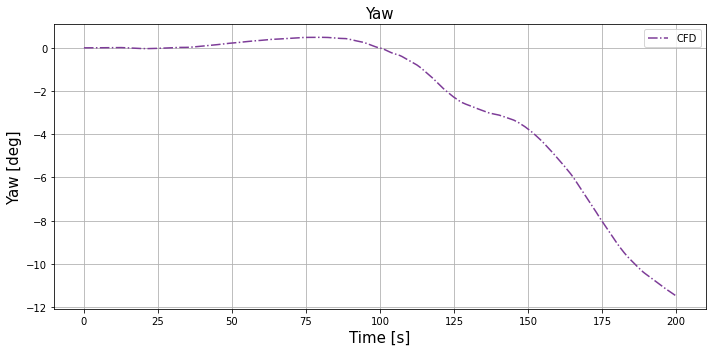

In [26]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(cfd_data_df['Time'], cfd_data_df['Yaw'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Yaw [deg]", fontsize=15)
ax.set_title("Yaw", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"Yaw.jpg", bbox_inches="tight", dpi=400)